# Data Visualization
This section the likehood of evrey lable in the dataset

In [ ]:
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
from pipeline import oversample, load_samples, DEFAULT_CONFIG, DEFAULT_TRAIN_SPLIT

import os
os.chdir(r"C:\Users\Gianmarco\Documents\assistente\assistente\training")
from train import train

from tester import tester


DATASET_DIR = Path('zendod_dataset')
LABEL_KEY = "intent"                   # o 'category', 'label', ecc.
MODEL_PATH = Path("models/text_response_model.joblib")
DATASET_DIR = Path("MASSIVE_dataset")
CONFIG = "massive"
SPLIT = "train"   # o "validation"

os.chdir(r"C:\Users\Gianmarco\Documents\assistente")
print("📂 Directory di lavoro attuale:", os.getcwd())


📂 Directory di lavoro attuale: C:\Users\Gianmarco\Documents\assistente


### Labels Loading

In [7]:
samples = load_samples(DATASET_DIR, config=CONFIG, split=SPLIT)
labels = [s.intent for s in samples]
prompts = [s.prompt for s in samples]

### Distribution analisys and plotting

📊 total exemples: 11514

label distribution:
calendar_set                     810 ( 7.03%)
play_music                       639 ( 5.55%)
weather_query                    573 ( 4.98%)
calendar_query                   566 ( 4.92%)
general_quirky                   555 ( 4.82%)
qa_factoid                       544 ( 4.72%)
news_query                       503 ( 4.37%)
email_query                      418 ( 3.63%)
email_sendemail                  354 ( 3.07%)
datetime_query                   350 ( 3.04%)
calendar_remove                  312 ( 2.71%)
play_radio                       283 ( 2.46%)
social_post                      283 ( 2.46%)
qa_definition                    267 ( 2.32%)
transport_query                  227 ( 1.97%)
cooking_recipe                   207 ( 1.80%)
lists_query                      198 ( 1.72%)
play_podcasts                    193 ( 1.68%)
recommendation_events            190 ( 1.65%)
alarm_set                        182 ( 1.58%)
lists_createoradd                17

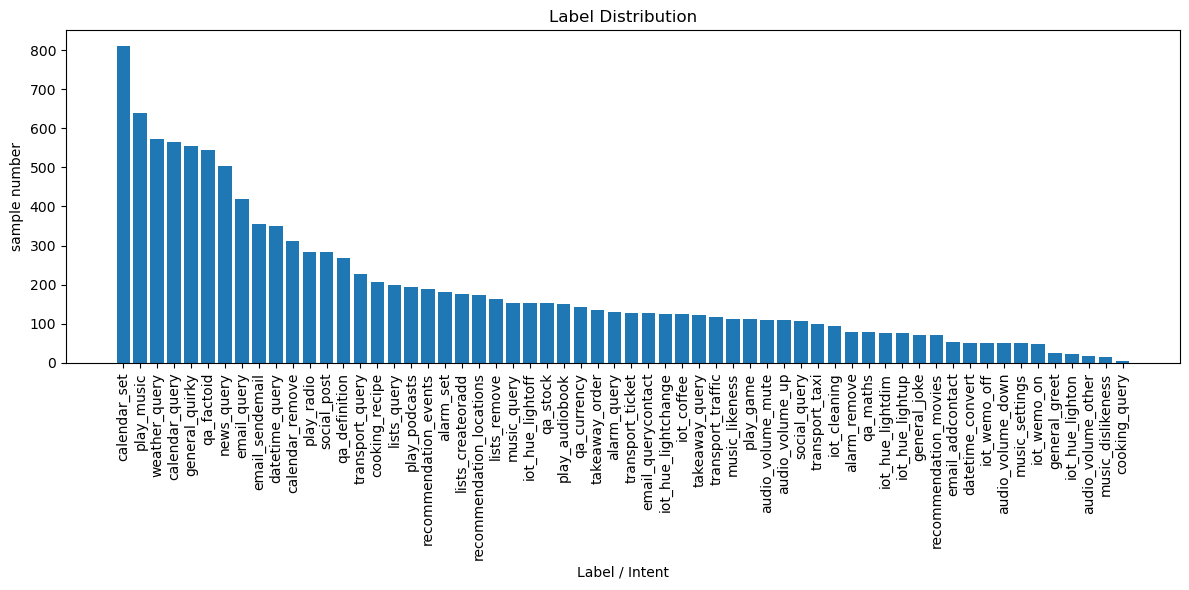

In [8]:
def plotter(labels):
    counter = Counter(labels)
    total = sum(counter.values())

    print(f"📊 total exemples: {total}\n")
    print("label distribution:")
    for label, count in counter.most_common():
        print(f"{label:30s} {count:5d} ({count/total*100:5.2f}%)")

    # --- Grafico ---
    labels_sorted = [l for l, _ in counter.most_common()]
    counts_sorted = [counter[l] for l in labels_sorted]

    plt.figure(figsize=(12, 6))
    bars = plt.bar(labels_sorted, counts_sorted)
    plt.xticks(rotation=90)
    plt.title("Label Distribution")
    plt.xlabel("Label / Intent")
    plt.ylabel("sample number")
    plt.tight_layout()
    plt.show()
plotter(labels=labels)

## Testing
On this dataset, a **loss function L** has been found and showed those results


📊 Risultati sullo split: test
                          precision    recall  f1-score   support

             alarm_query       0.91      0.88      0.90        34
            alarm_remove       0.95      0.90      0.93        21
               alarm_set       0.83      0.85      0.84        41
       audio_volume_down       0.90      0.82      0.86        11
       audio_volume_mute       0.80      0.88      0.84        32
      audio_volume_other       1.00      0.33      0.50         6
         audio_volume_up       0.82      0.69      0.75        13
          calendar_query       0.65      0.71      0.68       126
         calendar_remove       0.85      0.96      0.90        67
            calendar_set       0.76      0.88      0.82       209
          cooking_recipe       0.91      0.83      0.87        72
        datetime_convert       0.82      0.60      0.69        15
          datetime_query       0.85      0.89      0.87        88
        email_addcontact       0.58      0.5

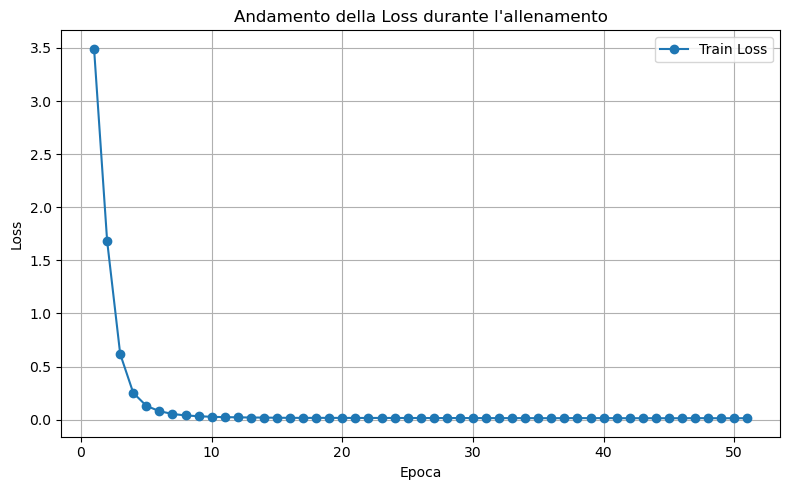

In [9]:
tester(plt=True)

## Oversample
The graph shows how some intent *[cooking_query, musik_dislikeness,. . .]* are less likely to apeare then others.

due to the distribution charateristic an atempt of **oversemple** is performed. In this way it should be possible to belance the data set 

✅ Oversampling completato (11514 → 11581 esempi)
📊 total exemples: 11581

label distribution:
calendar_set                     810 ( 6.99%)
play_music                       639 ( 5.52%)
weather_query                    573 ( 4.95%)
calendar_query                   566 ( 4.89%)
general_quirky                   555 ( 4.79%)
qa_factoid                       544 ( 4.70%)
news_query                       503 ( 4.34%)
email_query                      418 ( 3.61%)
email_sendemail                  354 ( 3.06%)
datetime_query                   350 ( 3.02%)
calendar_remove                  312 ( 2.69%)
play_radio                       283 ( 2.44%)
social_post                      283 ( 2.44%)
qa_definition                    267 ( 2.31%)
transport_query                  227 ( 1.96%)
cooking_recipe                   207 ( 1.79%)
lists_query                      198 ( 1.71%)
play_podcasts                    193 ( 1.67%)
recommendation_events            190 ( 1.64%)
alarm_set                       

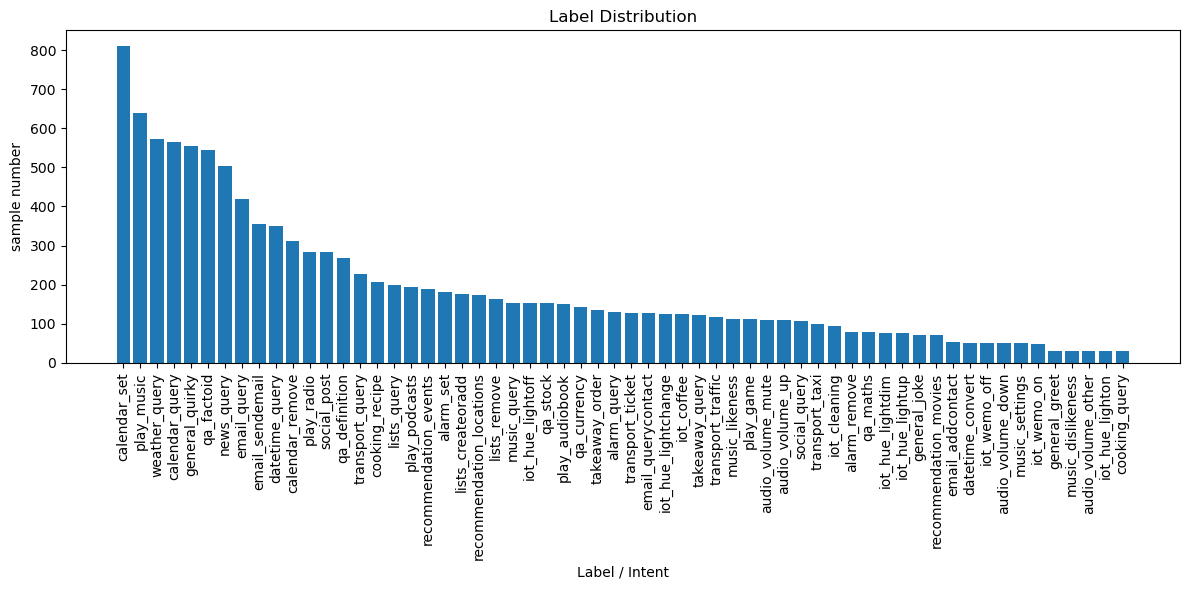

In [10]:
OS_texts, OS_labels = oversample(prompts, labels, min_count=30)

plotter(OS_labels)

Even thought the change is small, it is still visible. the rarest class contains more sample.

Now, we need to test the new data set as follow and test it to compare the previous resaults.


## Testing
On this dataset, a **loss function L** has been found and showed those results


📊 Risultati sullo split: test
                          precision    recall  f1-score   support

             alarm_query       0.97      0.85      0.91        34
            alarm_remove       0.91      0.95      0.93        21
               alarm_set       0.78      0.85      0.81        41
       audio_volume_down       0.89      0.73      0.80        11
       audio_volume_mute       0.79      0.81      0.80        32
      audio_volume_other       1.00      0.33      0.50         6
         audio_volume_up       0.69      0.69      0.69        13
          calendar_query       0.60      0.73      0.66       126
         calendar_remove       0.87      0.90      0.88        67
            calendar_set       0.82      0.85      0.83       209
          cooking_recipe       0.91      0.85      0.88        72
        datetime_convert       0.80      0.53      0.64        15
          datetime_query       0.90      0.88      0.89        88
        email_addcontact       0.54      0.5

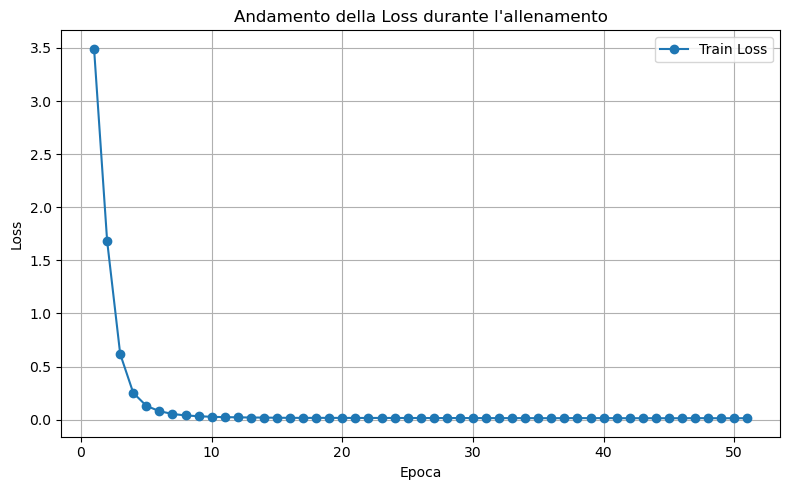

In [11]:
tester(plt=True, model_path = Path("models/text_response_model_Oversample.joblib"))